Binomial Naive Bayes

In [2]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#Importing libraries for comparison

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_breast_cancer, make_classification

In [90]:
#Creating the function for Naive Bayes Classifier

def fcnNaiveBayes(X, y, X_test):
    
    intNumberOfSamples, intNumberOfFeatures = X.shape
    yUniqueClass = np.unique(y)
    intNumberOfClass = len(yUniqueClass)
    
    xMean = np.zeros((intNumberOfClass, intNumberOfFeatures), dtype = np.float64)
    yPrior = np.zeros(intNumberOfClass, dtype = np.float64)
    
    for intClass in yUniqueClass:
        XForEachY = X[intClass == y]
        xMean[intClass, :] = XForEachY.mean(axis = 0)
        yPrior[intClass] = XForEachY.shape[0] / float(intNumberOfSamples)
        
    yPredicted = np.zeros(X_test.shape[0])
    yProbability = np.zeros(X_test.shape[0])
    
    for intSampleIndex, testSample in enumerate(X_test):
        yPosteriorForEachSample = np.zeros(intNumberOfClass)
        for intClassIndex, intClassLabel in enumerate(yUniqueClass):
            classPrior = np.log(yPrior[intClassIndex])
            classMean = xMean[intClassIndex]
            classProbability = 0
            for intFeatureIterator in range(len(testSample)):
                intProbablity = (classMean[intFeatureIterator]**testSample[intFeatureIterator])*((1-classMean[intFeatureIterator])**(1-testSample[intFeatureIterator]))
                if intProbablity > 1:
                    classProbability += np.log(intProbablity)
            yPosteriorForEachSample[intClassIndex] = classProbability + classPrior 
        yPredicted[intSampleIndex] = yUniqueClass[np.argmax(yPosteriorForEachSample)]
        yProbability[intSampleIndex] = np.exp(np.max(yPosteriorForEachSample))
        
    return yPredicted, yProbability

def fcnCalculateAccuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [91]:
#Creating Dummy data

x, y = make_classification(n_samples=500, n_clusters_per_class=2, n_features=10, n_classes=2, random_state=12)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

y_predicted, y_probabilities = fcnNaiveBayes(x_train, y_train, x_test)
accuracy = fcnCalculateAccuracy(y_predicted, y_test)
print("The Accuracy is : ", accuracy)

The Accuracy is :  0.52


C:\Users\RISHABH CHOUDHARY\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


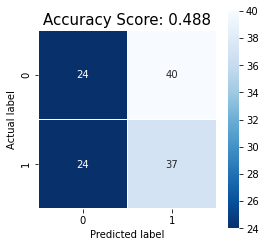

In [86]:
#Confusion Matrix 

cm = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [87]:
#Comparison with sklearn library

NBC = BernoulliNB()
NBC.fit(x_train, y_train)
y_Predicted =  NBC.predict(x_test)
score = metrics.accuracy_score(y_test, y_Predicted)
score

0.888

In [92]:
#Working on Toy Dataset

data = load_breast_cancer()
X = data['data']
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [93]:
#Using the Naive Bayes Classifier

Y_Pred, Y_Prob = fcnNaiveBayes(X_train, Y_train, X_test)
Accuracy = fcnCalculateAccuracy(Y_Pred, Y_test)

C:\Users\RISHABH CHOUDHARY\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\RISHABH CHOUDHARY\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars


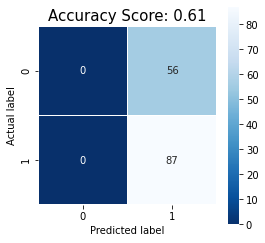

In [94]:
#Confusion Matrix 

cm_bc = metrics.confusion_matrix(Y_test, Y_Pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm_bc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(Accuracy, 2))
plt.title(all_sample_title, size = 15);

In [95]:
#Comparison with sklearn library

NBC2 = BernoulliNB()
NBC2.fit(X_train, Y_train)
Y_Predicted =  NBC2.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_Predicted)
score

0.6083916083916084